# Машинное обучение с подкреплением. Сбербанк июнь 2022.
## Семинар 2: Обзор сред. Q-обучение. Апроксимация Q-функции. 

### 1. Обзор сред

* [Classic Control](https://gym.openai.com/envs/#classic_control)
* [Box2D](https://gym.openai.com/envs/#box2d)
* [Atari](https://gym.openai.com/envs/#atari)
* [Gym Retro](https://openai.com/blog/gym-retro/)
* [Mujoco](https://gym.openai.com/envs/#mujoco)
* [Robotics](https://gym.openai.com/envs/#robotics)
* [Universe](https://openai.com/blog/universe/)
* [MineRL](https://minerl.io/) \(использует проект [malmo](https://www.microsoft.com/en-us/research/project/project-malmo/))
* [Starcraft II](https://github.com/deepmind/pysc2)
* [Biomechanics: Learning to move](https://www.aicrowd.com/challenges/neurips-2019-learning-to-move-walk-around)
* [Procgen](https://openai.com/blog/procgen-benchmark/)
* [Halitate on Kaggle](https://www.kaggle.com/c/halite) 
* [Flatland](https://www.aicrowd.com/challenges/neurips-2020-flatland-challenge)
* Настольные игры: Chess, GO и т.д. (множество среда на github)
* [Learning to Run a Power Network](https://competitions.codalab.org/competitions/20767) \(ссылка на [NIPS](https://nips.cc/Conferences/2020/CompetitionTrack))
* ...

### 2. Q-обучение


Одним из наиболее популярных алгоритм обучения на основе временных различий является Q-обучение.

<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/678cb558a9d59c33ef4810c9618baf34a9577686">


Раскроем скобки:
$$Q(s,a)\leftarrow (1 - \alpha) \times Q(s,a)+\alpha \times \big (r(s)+\gamma\max_{a'}Q(a',s')\big ).$$

Для обучения будем использовать среду Taxi-v3. Подробнее про данное окружение можно посмотреть в документации: https://gym.openai.com/envs/Taxi-v3/.

In [1]:
import gym
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
env = gym.make("Taxi-v3")
env.render()

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+



In [3]:
def show_progress(rewards_batch, log, reward_range=None):
    """
    Удобная функция, которая отображает прогресс обучения.
    """

    if reward_range is None:
        reward_range = [-990, +10]
    mean_reward = np.mean(rewards_batch)
    log.append([mean_reward])

    clear_output(True)
    plt.figure(figsize=[8, 4])
    plt.subplot(1, 2, 1)
    plt.plot(list(zip(*log))[0], label='Mean rewards')
    plt.legend(loc=4)
    plt.grid()
    plt.grid()
    plt.show()

#### Задание 1

Создайте таблицу из нулей, используя информацию из окружения о количестве состояний и действий

In [4]:
import random
from IPython.display import clear_output

# гиперпараметры алгоритма
alpha = 0.1
gamma = 0.9
epsilon = 0.1
episodes_number = 10001

In [5]:
def initialize_q_table(observation_space_n, action_space_n):
    # Q = [state][action]
    ####### Здесь ваш код ########
    Q = np.zeros([observation_space_n, action_space_n])
    ##############################
    return Q

In [6]:
# Добавить проверку таблицы - размеры, тип.
n_states, n_actions = 3, 5
Q = initialize_q_table(n_states, n_actions)
assert isinstance(Q, np.ndarray) and len(Q.shape) == 2, 'результат должен быть 2D нумпаевским вектором'
assert Q.shape[0] == n_states and Q.shape[1] == n_actions, 'проверь размерности: [N состояний][M действий]'
assert not Q.any(), 'инициализация должна быть нулями'

#### Задание 2

Допишите недостающий код для алгоритма Q-обучения


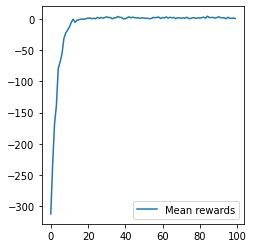

Episode: 10000, Reward: 7


In [7]:
# определяем память, в которой будет храниться Q(s,a)
q_table = initialize_q_table(env.observation_space.n, env.action_space.n)
log = []
rewards_batch = []

for i in range(1, episodes_number):
    state = env.reset()

    episode, r, episode_reward = 0, 0, 0
    done = False
    
    while not done:
        # получаем жадное действие
        action_greed = np.argmax(q_table[state])
        # выбираем действие, используя eps-greedy исследование среды
        # с вероятностью epsilon выбираем случайное действие, иначе 
        # используем жадно действие 
        # подсказка: для выбора случайного действия можно использовать 
        # методы среды - env.action_space.sample()
        # action = 
        ####### Здесь ваш код ########
        if epsilon < np.random.random():
            # используем Q-функцию
            action = np.argmax(q_table[state])
        else:
            action = np.random.choice(q_table.shape[1])
        ##############################
        
        # выполняем действие в среде 
        next_state, r, done, info = env.step(action) 
        
        # получаем old_value и value_estimate (estimate of optimal future value)
        old_value = q_table[state, action]
        next_value_estimate = np.max(q_table[next_state])
        
        # посчитайте new_value (temporal difference target)
        # new_value = 
        ####### Здесь ваш код ########
        new_value = r + gamma * next_value_estimate
        ##############################
        
        q_table[state, action] = (1 - alpha) * old_value + alpha *  new_value 

        state = next_state
        episode += 1
        episode_reward += r
    rewards_batch.append(episode_reward)
     
    if i % 100 == 0:
        show_progress(rewards_batch, log)
        rewards_batch = []
        print(f"Episode: {i}, Reward: {episode_reward}")

### Интерпретация результатов:
Если все сделано правильно, то график должен выйти на плато около 0. Значение вознаграждение будет в диапазоне [-5, 10], за счет случайного выбора начальной позиции такси и пассажира. Попробуйте изменить гиперпараметры и сравните результаты.

## 4. Аппроксимация Q-функции

В данном пункте мы будем использовать библиотеку pytorch для обучения нейронной сети, хотя можно использовать и любую другую библиотеку.

In [8]:
import gym
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
env = gym.make("CartPole-v0").env
env.reset()
n_actions = env.action_space.n
state_dim = env.observation_space.shape

# plt.imshow(env.render("rgb_array"))
env.close()

Так как описание состояния в задаче с маятником представляет собой не "сырые" признаки, а уже предобработанные (координаты, углы), нам не нужна для начала сложная архитектура, начнем с такой:
<img src="https://raw.githubusercontent.com/Tviskaron/mipt/master/2020/RL/figures/DQN.svg">
Для начала попробуйте использовать только полносвязные слои (``torch.nn.Linear``) и простые активационные функции (``torch.nn.ReLU``). Сигмоиды и другие функции не будут работать с ненормализованными входными данными.

In [10]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [11]:
!pip freeze | grep torch

torch @ https://download.pytorch.org/whl/cu113/torch-1.11.0%2Bcu113-cp37-cp37m-linux_x86_64.whl
torchaudio @ https://download.pytorch.org/whl/cu113/torchaudio-0.11.0%2Bcu113-cp37-cp37m-linux_x86_64.whl
torchsummary==1.5.1
torchtext==0.12.0
torchvision @ https://download.pytorch.org/whl/cu113/torchvision-0.12.0%2Bcu113-cp37-cp37m-linux_x86_64.whl


Определяем граф вычислений:

In [12]:
# network = nn.Sequential(
# torch.nn.Linear(state_dim[0], ...),
# ...
####### Здесь ваш код ########
hidden_dims = [128, 128]
network = nn.Sequential(
    nn.Linear(state_dim[0], hidden_dims[0]), 
    nn.ReLU(),
    nn.Linear(hidden_dims[0], hidden_dims[1]),
    nn.ReLU(),
    nn.Linear(hidden_dims[1], n_actions),
)
##############################

In [13]:
def get_action(state, epsilon=0):
    """
    сэмплируем (eps greedy) действие
    """
    # [3, 2]
    # [[3, 2]]
    state = torch.tensor(state[None], dtype=torch.float32)
    q_values = network(state).detach().numpy()
    
    # action = 
    ####### Здесь ваш код ########
    if epsilon < np.random.random_sample():
        action = np.argmax(q_values)
    else:
        n_actions = q_values.shape[-1]
        action = np.random.choice(n_actions)
    ##############################
    
    return int(action)

In [14]:
s = env.reset()
assert tuple(network(torch.tensor([s]*3, dtype=torch.float32)).size()) == (
    3, n_actions), "Убедитесь, что модель переводит s -> [Q(s,a0), ..., Q(s, a_last)]"
assert isinstance(list(network.modules(
))[-1], nn.Linear), "убедитесь, что вы предсказываете q без нелинейности"
assert isinstance(get_action(
    s), int), "убедитесь, что функция get_action() возвращает только одно действие типа integer" % (type(get_action(s)))

# проверяем исследование среды
for eps in [0., 0.1, 0.5, 1.0]:
    state_frequencies = np.bincount(
        [get_action(s, epsilon=eps) for i in range(10000)], minlength=n_actions)
    best_action = state_frequencies.argmax()
    assert abs(state_frequencies[best_action] -
               10000 * (1 - eps + eps / n_actions)) < 200
    for other_action in range(n_actions):
        if other_action != best_action:
            assert abs(state_frequencies[other_action] -
                       10000 * (eps / n_actions)) < 200
    print('e=%.1f тесты пройдены' % eps)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  ../torch/csrc/utils/tensor_new.cpp:210.)
  


e=0.0 тесты пройдены
e=0.1 тесты пройдены
e=0.5 тесты пройдены
e=1.0 тесты пройдены


Теперь будем приближать Q-функцию агента, минимизируя TD функцию потерь:
$$ L = { 1 \over N} \sum_i (Q_{\theta}(s,a) - [r(s,a) + \gamma \cdot max_{a'} Q_{-}(s', a')]) ^2,$$
где
* $s, a, r, s'$ состояние, действие, вознаграждение и следующее состояние 
* $\gamma$ дисконтирующий множетель.

Основная тонкость состоит в использовании $Q_{-}(s',a')$. Эта та же самая функция, что и $Q_{\theta}$, которая является выходом нейронной сети, но при обучении сети, мы не пропускаем через эти слои градиенты. 

In [15]:
def compute_td_loss(states, actions, rewards, next_states, is_done, gamma=0.99, check_shapes=False):
    """ Считатет td ошибку, используя лишь операции фреймворка torch. Используйте формулу выше. """
    
    # переводим входные данные в тензоры
    states = torch.tensor(states, dtype=torch.float32)    # shape: [batch_size, state_size]
    actions = torch.tensor(actions, dtype=torch.long)     # shape: [batch_size] 
    rewards = torch.tensor(rewards, dtype=torch.float32)  # shape: [batch_size]
    
    
    next_states = torch.tensor(next_states, dtype=torch.float32) # shape: [batch_size, state_size]
    is_done = torch.tensor(is_done, dtype=torch.uint8)    # shape: [batch_size]

    # получаем значения q для всех действий из текущих состояний
    predicted_qvalues = network(states)

    # получаем q-values для выбранных действий
    predicted_qvalues_for_actions = predicted_qvalues[range(states.shape[0]), actions]

    # применяем сеть для получения q-value для следующих состояний (next_states)
    # predicted_next_qvalues =
    ####### Здесь ваш код ########
    predicted_next_qvalues = network(next_states)
    ##############################
    
    # вычисляем V*(next_states), что соответствует max_{a'} Q(s',a')
    # next_state_values =
    ####### Здесь ваш код ########
    next_state_values = torch.max(predicted_next_qvalues.detach(), axis=-1)[0]
    ##############################
    
    assert next_state_values.dtype == torch.float32

    # вычисляем target q-values для функции потерь, 
    # что соответствует выражению в квадртаных скобках
    #  target_qvalues_for_actions =
    ####### Здесь ваш код ########
    target_qvalues_for_actions = rewards + gamma * next_state_values 
    ##############################
    
    # для последнего действия используем 
    # упрощенную формулу Q(s,a) = r(s,a), 
    # т.к. s' для него не существует
    target_qvalues_for_actions = torch.where(is_done, rewards, target_qvalues_for_actions)

    # MSE loss для минимизации
    loss = torch.mean((predicted_qvalues_for_actions - target_qvalues_for_actions.detach()) ** 2)

    if check_shapes:
        assert predicted_next_qvalues.data.dim(
        ) == 2, "убедитесь, что вы предсказали q-значения для всех действий в следующем состоянии"
        assert next_state_values.data.dim(
        ) == 1, "убедитесь, что вы вычислили V (s ') как максимум только по оси действий, а не по всем осям"
        assert target_qvalues_for_actions.data.dim(
        ) == 1, "что-то не так с целевыми q-значениями, они должны быть вектором"

    return loss

In [16]:
# небольшие проверки
s = env.reset()
a = env.action_space.sample()
next_s, r, done, _ = env.step(a)
loss = compute_td_loss([s], [a], [r], [next_s], [done], check_shapes=True)
loss.backward()

assert len(loss.size()) == 0, "функция должна вычислять скалярный loss - среднее по батчу"
assert np.any(next(network.parameters()).grad.detach().numpy() !=
              0), "loss должен быть дифференцируемым по весам сети"

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: UserWarning: where received a uint8 condition tensor. This behavior is deprecated and will be removed in a future version of PyTorch. Use a boolean condition instead. (Triggered internally at  ../aten/src/ATen/native/TensorCompare.cpp:333.)


In [17]:
opt = torch.optim.Adam(network.parameters(), lr=1e-4)

In [18]:
def generate_session(env, t_max=1000, epsilon=0, train=False):
    """генерация сессии и обучение"""
    total_reward = 0
    s = env.reset()

    for t in range(t_max):
        a = get_action(s, epsilon=epsilon)
        next_s, r, done, _ = env.step(a)

        if train:
            opt.zero_grad()
            compute_td_loss([s], [a], [r], [next_s], [done]).backward()
            opt.step()

        total_reward += r
        s = next_s
        if done:
            break

    return total_reward

In [19]:
epsilon = 0.5

In [20]:
for i in range(150):
    session_rewards = [generate_session(env, epsilon=epsilon, train=True) for _ in range(100)]
    print("Epoch: #{}\tmean reward = {:.3f}\tepsilon = {:.3f}".format(i, np.mean(session_rewards), epsilon))

    epsilon *= 0.9
    assert epsilon >= 1e-4, "убедитесь, что epsilon не становится < 0"

    if np.mean(session_rewards) > 200:
        print("Принято!")
        break

Epoch: #0	mean reward = 13.860	epsilon = 0.500
Epoch: #1	mean reward = 14.040	epsilon = 0.450
Epoch: #2	mean reward = 13.160	epsilon = 0.405
Epoch: #3	mean reward = 14.890	epsilon = 0.365
Epoch: #4	mean reward = 14.800	epsilon = 0.328
Epoch: #5	mean reward = 21.620	epsilon = 0.295
Epoch: #6	mean reward = 34.690	epsilon = 0.266
Epoch: #7	mean reward = 23.940	epsilon = 0.239
Epoch: #8	mean reward = 33.620	epsilon = 0.215
Epoch: #9	mean reward = 35.030	epsilon = 0.194
Epoch: #10	mean reward = 72.960	epsilon = 0.174
Epoch: #11	mean reward = 90.370	epsilon = 0.157
Epoch: #12	mean reward = 147.460	epsilon = 0.141
Epoch: #13	mean reward = 180.150	epsilon = 0.127
Epoch: #14	mean reward = 116.920	epsilon = 0.114
Epoch: #15	mean reward = 168.440	epsilon = 0.103
Epoch: #16	mean reward = 184.730	epsilon = 0.093
Epoch: #17	mean reward = 103.650	epsilon = 0.083
Epoch: #18	mean reward = 62.060	epsilon = 0.075
Epoch: #19	mean reward = 61.020	epsilon = 0.068
Epoch: #20	mean reward = 104.650	epsilon = 0

### Интерпретация результатов:

Добро пожаловать в мир глубокого обучения с подкреплением! Не ждите, что вознаграждение агента будет увеличиваться плавно. Может быть оно начнет расти, если сочтет ваш код достойным :)

А если серьезно,
* __mean reward__ $-$ это среднее вознаграждение за игру. При правильной реализации оно может оставаться низким в течение первых 10 эпох, а затем начнет расти, и сойдется к ~50-100 эпохе, в зависимости от архитектуры сети.
* Если со сходимость возникли проблемы $-$ попробуйте увеличить количество скрытых нейронов или обратите внимание на эпсилон.
* __epsilon__ $-$ agent's willingness to explore. Если вы видите, что эпислон находится на уровне <0.01, до того, как агент достиг вознаграждения >= 200, установите первоначальное значение 0.1 - 0.5.

### Посмотрим на результаты:

Подключаем визуализацию:

In [15]:
try:
    import colab
    COLAB = True
except ModuleNotFoundError:
    COLAB = False
    pass

if COLAB:
    !wget https://gist.githubusercontent.com/Tviskaron/4d35eabce2e057dd2ea49a00b00aaa41/raw/f1e25fc6ac6d8f11cb585559ce8b2ab9ffefd67b/colab_render.sh -O colab_render.sh -q
    !sh colab_render.sh
    !wget https://gist.githubusercontent.com/Tviskaron/d91decc1ca5f1b09af2f9f080011a925/raw/0d3474f65b4aea533996ee00edf99a37e4da5561/colab_render.py -O colab_render.py -q 
    import colab_render

     |████████████████████████████████| 448 kB 7.0 MB/s 
Selecting previously unselected package python-opengl.
(Reading database ... 155632 files and directories currently installed.)
Preparing to unpack .../python-opengl_3.1.0+dfsg-1_all.deb ...
Unpacking python-opengl (3.1.0+dfsg-1) ...
Setting up python-opengl (3.1.0+dfsg-1) ...
Selecting previously unselected package xvfb.
(Reading database ... 157987 files and directories currently installed.)
Preparing to unpack .../xvfb_2%3a1.19.6-1ubuntu4.10_amd64.deb ...
Unpacking xvfb (2:1.19.6-1ubuntu4.10) ...
Setting up xvfb (2:1.19.6-1ubuntu4.10) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
     |████████████████████████████████| 67 kB 3.7 MB/s 


In [16]:
# библиотеки и функции, которые потребуеются для показа видео

import glob
import io
import base64
from IPython import display as ipythondisplay
from IPython.display import HTML
from gym.envs.classic_control import rendering
import matplotlib.pyplot as plt

%matplotlib inline


org_constructor = rendering.Viewer.__init__


def constructor(self, *args, **kwargs):
    org_constructor(self, *args, **kwargs)
    self.window.set_visible(visible=False)


rendering.Viewer.__init__ = constructor


def show_video(folder="./video"):
    mp4list = glob.glob(folder + '/*.mp4')
    if len(mp4list) > 0:
        mp4 = sorted(mp4list, key=lambda x: x[-15:], reverse=True)[0]
        video = io.open(mp4, 'r+b').read()
        encoded = base64.b64encode(video)
        ipythondisplay.display(HTML(data='''<video alt="test" autoplay 
                loop controls style="height: 400px;">
                <source src="data:video/mp4;base64,{0}" type="video/mp4" />
             </video>'''.format(encoded.decode('ascii'))))
    else:
        print("Could not find video")

In [17]:
env = gym.make("CartPole-v0")
env = gym.wrappers.Monitor(env, "./video", force=True)

generate_session(env, epsilon=0, train=False)

env.close()
show_video()